In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel(r'C:\Users\SUHAIR\Desktop\DSA\iris1.xls')

In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64


Missing values present in the dataset.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,143.0,5.855944,0.828168,4.3,5.1,5.80,6.4,7.9
SW,144.0,3.049306,0.430644,2.0,2.8,3.00,3.3,4.4
PL,144.0,3.756250,1.761306,1.0,1.6,4.35,5.1,6.9
PW,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
data.median()

SL    5.80
SW    3.00
PL    4.35
PW    1.30
dtype: float64

In [9]:
data.mean()

SL    5.855944
SW    3.049306
PL    3.756250
PW    1.198667
dtype: float64

Replacing missing values with the median:

In [10]:
col=['SL','SW','PL']
for i in col:
    data[i] = data[i].fillna(data[i].median())

In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 0.98, 'SL')

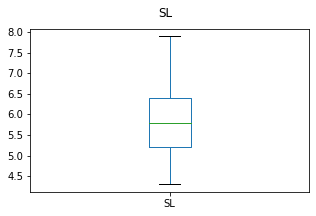

In [12]:
fig = plt.figure(figsize=(5,3))
data['SL'].plot(kind='box')
fig.suptitle('SL')

Text(0.5, 0.98, 'PL')

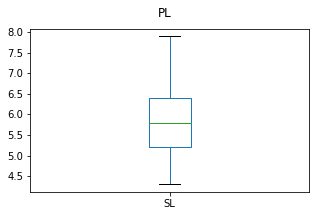

In [13]:
fig = plt.figure(figsize=(5,3))
data['SL'].plot(kind='box')
fig.suptitle('PL')

Text(0.5, 0.98, 'SW')

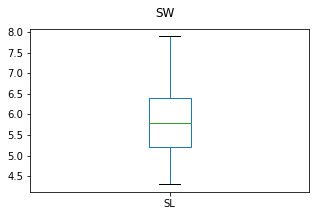

In [14]:
fig = plt.figure(figsize=(5,3))
data['SL'].plot(kind='box')
fig.suptitle('SW')

Text(0.5, 0.98, 'PW')

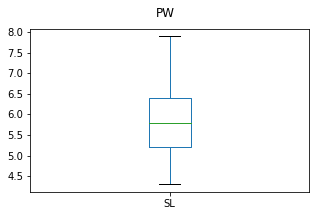

In [15]:
fig = plt.figure(figsize=(5,3))
data['SL'].plot(kind='box')
fig.suptitle('PW')

In [16]:
data['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Classification, dtype: int64

Scaling the categorical data into numerical value inorder to perform ML techniques:

In [25]:
from sklearn.preprocessing import LabelEncoder
data['Classification'] = LabelEncoder().fit_transform(data['Classification'])
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

Function to check model performances:

In [27]:
x = data[data.columns[:-1]]
y = data['Classification']
print(f'Feature shape: {x.shape}')

Feature shape: (150, 4)


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 120 samples.
Testing set has 30 samples.


1.SVM Models: (Linear, Polynomial and RBF)



In [29]:
from sklearn.svm import SVC
lin = SVC(kernel='linear', decision_function_shape='ovo') 
lin.fit(x_train, y_train)
lin_pred = lin.predict(x_test)
check_model_metrices(y_test, lin_pred)

Model Accuracy =  1.0
Model Precision =  1.0
Model Recall =  1.0
Model F1 Score =  1.0
Confusion Matrix = 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [30]:
poly = SVC(kernel='poly', degree = 3, decision_function_shape='ovo')
poly.fit(x_train, y_train)
poly_pred = poly.predict(x_test)
check_model_metrices(y_test, poly_pred)

Model Accuracy =  0.9666666666666667
Model Precision =  0.9666666666666667
Model Recall =  0.9666666666666667
Model F1 Score =  0.9666666666666667
Confusion Matrix = 
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [31]:
rbf = SVC(kernel='rbf', decision_function_shape='ovo') 
rbf.fit(x_train, y_train)
rbf_pred = rbf.predict(x_test)
check_model_metrices(y_test, rbf_pred)

Model Accuracy =  1.0
Model Precision =  1.0
Model Recall =  1.0
Model F1 Score =  1.0
Confusion Matrix = 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


2. Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier()
dtree_model.fit(x_train, y_train)
dtree_pred = dtree_model.predict(x_test)

check_model_metrices(y_test, dtree_pred)

Model Accuracy =  1.0
Model Precision =  1.0
Model Recall =  1.0
Model F1 Score =  1.0
Confusion Matrix = 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


3. Random Forest



In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

check_model_metrices(y_test, rf_pred)

Model Accuracy =  1.0
Model Precision =  1.0
Model Recall =  1.0
Model F1 Score =  1.0
Confusion Matrix = 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


4.Linear Regression:



In [35]:
from sklearn.linear_model import LogisticRegression
lnr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lnr.fit(x_train, y_train)
lnr_pred = lnr.predict(x_test)

check_model_metrices(y_test, lnr_pred)

Model Accuracy =  1.0
Model Precision =  1.0
Model Recall =  1.0
Model F1 Score =  1.0
Confusion Matrix = 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Applying Scaling:



In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.fit_transform(x_test)

# 1. Linear Regression After Scaling:



In [37]:
from sklearn.linear_model import LogisticRegression
lnr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lnr.fit(x_train, y_train)
lnr_pred = lnr.predict(x_test)

check_model_metrices(y_test, lnr_pred)

Model Accuracy =  0.9666666666666667
Model Precision =  0.9666666666666667
Model Recall =  0.9666666666666667
Model F1 Score =  0.9666666666666667
Confusion Matrix = 
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


# 2. SVM models After Scaling:



In [38]:
lin = SVC(kernel='linear', decision_function_shape='ovo') 
lin.fit(x_train, y_train)
lin_pred = lin.predict(x_test)

check_model_metrices(y_test, lin_pred)

Model Accuracy =  0.9333333333333333
Model Precision =  0.9333333333333333
Model Recall =  0.9333333333333333
Model F1 Score =  0.9333333333333333
Confusion Matrix = 
 [[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [39]:
poly = SVC(kernel='poly', degree = 3, decision_function_shape='ovo')
poly.fit(x_train, y_train)
poly_pred = poly.predict(x_test)

check_model_metrices(y_test, poly_pred)

Model Accuracy =  0.8666666666666667
Model Precision =  0.8666666666666667
Model Recall =  0.8666666666666667
Model F1 Score =  0.8666666666666667
Confusion Matrix = 
 [[10  0  0]
 [ 0  8  1]
 [ 0  3  8]]


In [40]:
rbf = SVC(kernel='rbf', decision_function_shape='ovo') 
rbf.fit(x_train, y_train)
rbf_pred = rbf.predict(x_test)

check_model_metrices(y_test, rbf_pred)

Model Accuracy =  0.9666666666666667
Model Precision =  0.9666666666666667
Model Recall =  0.9666666666666667
Model F1 Score =  0.9666666666666667
Confusion Matrix = 
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


# 3. Decision Tree After Scaling:

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier()
dtree_model.fit(x_train, y_train)
dtree_pred = dtree_model.predict(x_test)

check_model_metrices(y_test, dtree_pred)

Model Accuracy =  0.9666666666666667
Model Precision =  0.9666666666666667
Model Recall =  0.9666666666666667
Model F1 Score =  0.9666666666666667
Confusion Matrix = 
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


# 4. Random Forest After Scaling:

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

check_model_metrices(y_test, rf_pred)

Model Accuracy =  1.0
Model Precision =  1.0
Model Recall =  1.0
Model F1 Score =  1.0
Confusion Matrix = 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# From the analysis, its obsereved that Decision tree gives the best performance scores after scaling.

Followed by Random Forest model(96% accuracy), followed by SVM linear model(93%).